In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [8]:
df= pd.read_csv("/Users/sakhwathosan/Downloads/marital status.csv")

In [9]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [10]:
df.shape

(20, 2)

In [11]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [12]:
fill= df['status'].median()
fill

0.0

In [13]:
df.status = df.status.fillna(fill)

In [14]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [15]:
df.isnull().sum()

age       0
status    0
dtype: int64

In [16]:
df['status'].value_counts()

0.0    11
1.0     9
Name: status, dtype: int64

In [17]:
X = df[['age']]

In [18]:
X

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,29
9,22


In [19]:
y= df['status']

In [20]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    1.0
Name: status, dtype: float64

Text(0.5, 1.0, 'Status Prediction')

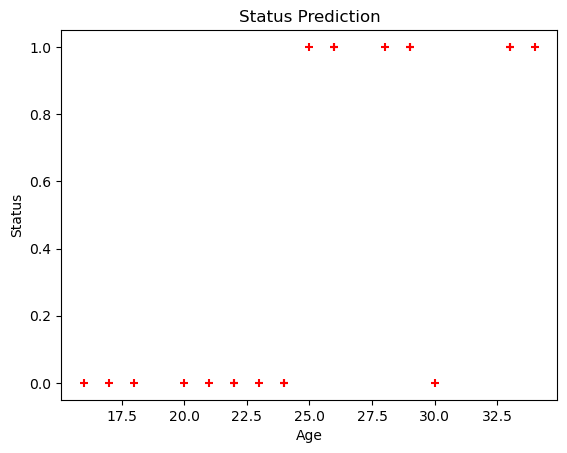

In [21]:
plt.scatter(X,y, marker='+',color='red')
plt.xlabel("Age")
plt.ylabel("Status")
plt.title("Status Prediction")

<Axes: xlabel='age', ylabel='status'>

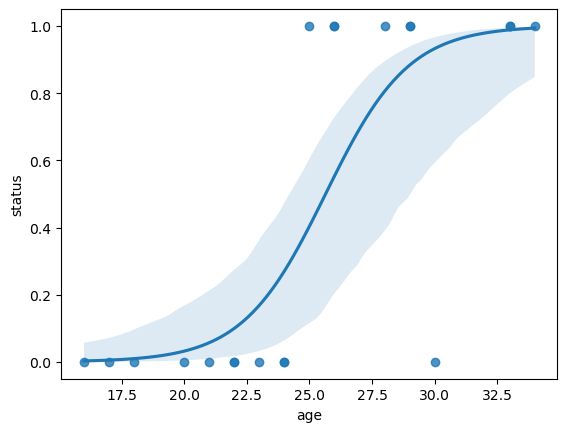

In [22]:
X=df['age']
y=df['status']
sns.regplot(x=X,y=y,data=df,logistic=True)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [30]:
r=LogisticRegression()
r.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[17. 18. 30. 33. 24. 21. 25. 26. 22. 29. 29. 22. 20. 33.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
pred=r.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [26]:
r.score(X_test,y_test)*100

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [24]:
r.predict_proba(X_test)

array([[0.28697051, 0.71302949],
       [0.9902967 , 0.0097033 ],
       [0.80161052, 0.19838948],
       [0.50311753, 0.49688247],
       [0.71810555, 0.28189445],
       [0.02465085, 0.97534915]])

In [26]:
accuracy_score(y_test,pred)*100

83.33333333333334

In [4]:
cnf_matrix=confusion_matrix(y_test,pred)
cnf_matrix

NameError: name 'y_test' is not defined

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



NameError: name 'cnf_matrix' is not defined

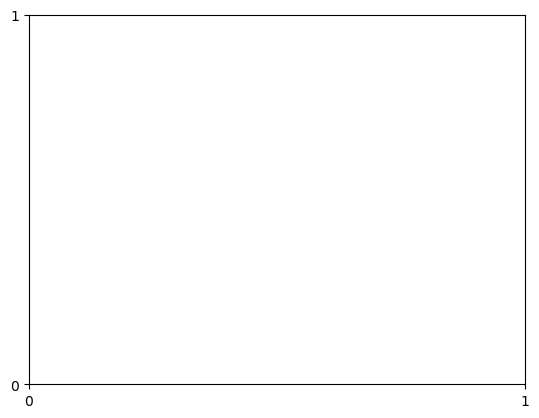

In [3]:
import seaborn as sns
%matplotlib inline

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')